# 2.2 パーセプトロンの学習アルゴリズムをPythonで実装する

## 2.2.1 オブジェクト指向のパーセプトロンAPI

In [3]:
import numpy as np

class Perceptron(object):
    """パーセプトロンの分類器
    
    パラメータ
    ---------------
    eta : float
            学習率（0.0より大きく1.0以下の値）
    n_iter : int
            トレーニングデータのトレーニング回数
    random_state : int
            重みを初期化するための乱数シード
        
    属性
    ---------------
    w_ : 1次元配列
            適合後の重み
    errors_ : リスト
            各エポックでの誤分類（更新）の数
    
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, x, y):
        """トレーニングデータに適合させる
        
        パラメータ
        ----------------
        X : { 配列のようなデータ構造　}, shape = [n_sample, n_features]
             トレーニングデータ
             n_sampleはサンプルの個数、n_featuresは特徴量の個数
        Y : 配列のようなデータ構造, shape = [n_sample]
             目的変数
        
        戻り値
        -----------
        self : object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):    # トレーニング回数分トレーニングデータを反復
            errors = 0
            for xi, target in zip(X, y):     # 各サンプルで重みを更新
                # 重みw(i=1~)の更新
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                # 重みw(i=0)の更新
                self.w_[0] += update
                # 重みの更新が0でない場合は誤分類としてカウント
                errors += int(update != 0.0)
            # 反復回数ごとの誤差を格納
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """総入力を計算"""
        return np.dot(X, self.w_[1:] ) + self.w_[0]
    
    def predict(self, X):
        """1ステップ後のクラスラベルを返す"""
        return np.where(self.net_input(X) >= 0.0, 1, -1
                       )

# 2.3 Irisデータセットでのパーセプトロンモデルのトレーニング

In [4]:
import pandas as pd

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)

In [5]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", -1, 1)
X = df.iloc[0:100,  [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1], color="red", marker="o", label="setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue", marker="x", label="versicpolor")
plt.xlabel("sepal length [cm]")
plt.ylabel("petal length [cm]")
plt.legend(loc="upper left")

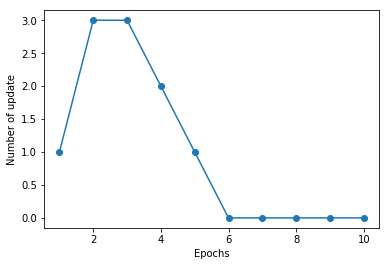

In [7]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Number of update")
plt.show()

In [8]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # マーカーとカラーマップの準備
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #　グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                                              np.arange(x2_min, x2_max, resolution))
    # 各特徴量を1次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # 予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    # グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                            y=X[y == cl, 1],
                            alpha=0.8,
                            c=colors[idx],
                            marker=markers[idx],
                            label=cl,
                            edgecolor="black")

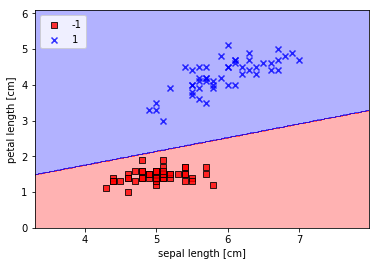

In [9]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel("sepal length [cm]")
plt.ylabel("petal length [cm]")
plt.legend(loc="upper left")
plt.show()

## 2.5.1 ADALINEをPythonで実装する

In [10]:
class AdalineGD(object):
    """ADAptive LInear NEuron分類器
    
    パラメータ
    ---------------
    eta : float
             学習率（0.0より大きく1.0以下の値）
    n_iter : int
             トレーニングデータのトレーニング回数
    random_state : int
             重みを初期化するための乱数シード
    
    属性
    -----------
    w_ : 1次元配列
            　適合後の重み
    cost_ : リスト
            　各エポックでの誤差平方和のコスト関数
             
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """　トレーニングデータに適合させる
        
        パラメータ
        ----------------
        X : {　配列のようなデータ構造　}, shape = [n_sample, n_feature]
             トレーニングデータ
             n_sampleはサンプルの個数、n_featureは特徴量の個数
        Y : 配列のようなデータ構造, shape = [n_sample]
             目的変数
        
        戻り値
        -----------
        self : object
        
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):    # トレーニング回数分トレーニングデータを反復
            net_input = self.net_input(X)
            # activationメソッドは単なる恒等関数であるため、
            # このコードでは何の効果もないことに注意。代わりに、
            # 直接'output = self.net_input(X)'と記述することもできた。
            # activationメソッドの目的は、より概念的なものである。
            # つまり、（後ほど説明する）ロジステッィック回帰の場合は、
            # ロジスティック回帰の分類器を変更するために
            # シグモイド関数に変更することもできる。
            output = self.activation(net_input)
            # 誤差y - ø(z)の計算
            errors = (y - output)
            # w(n:1~m)の更新
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """総入力を計算"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """線形活性化関数を計算"""
        return X
    
    def predict(self, X):
        """1ステップ後のクラスラベルを返す"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

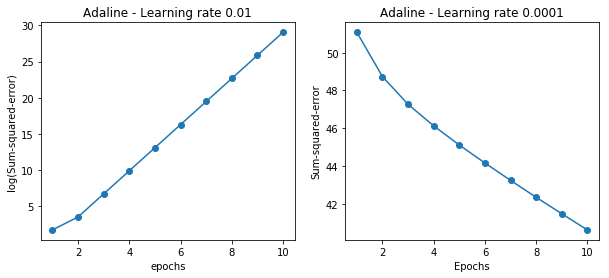

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker="o")
ax[0].set_xlabel("epochs")
ax[0].set_ylabel("log(Sum-squared-error)")
ax[0].set_title("Adaline - Learning rate 0.01")
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker="o")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Sum-squared-error")
ax[1].set_title("Adaline - Learning rate 0.0001")
plt.show()

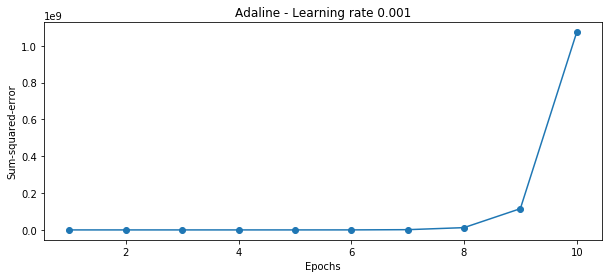

In [23]:
# おまけ
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
ada3 = AdalineGD(n_iter=10, eta=0.001).fit(X, y)
ax.plot(range(1, len(ada3.cost_) + 1), ada3.cost_, marker="o")
ax.set_xlabel("Epochs")
ax.set_ylabel("Sum-squared-error")
ax.set_title("Adaline - Learning rate 0.001")
plt.show()

In [20]:
X_std = np.copy(X)
# 各列の標準化
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

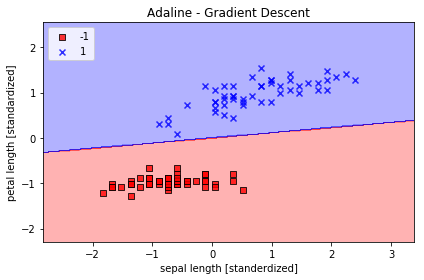

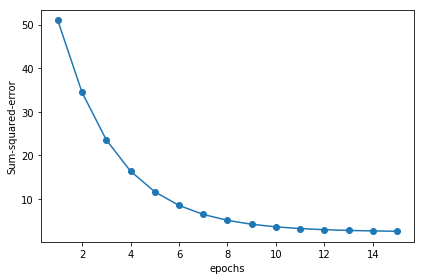

In [26]:
ada = AdalineGD(n_iter=15, eta=0.01)
# モデルの適合
ada.fit(X_std, y)
#　境界領域のプロット
plot_decision_regions(X_std, y, classifier=ada)
plt.title("Adaline - Gradient Descent")
plt.xlabel("sepal length [standerdized]")
plt.ylabel("petal length [standardized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()
# エポック数とコストの関係を示す折れ線グラフのプロット
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker="o")
plt.xlabel("epochs")
plt.ylabel("Sum-squared-error")
plt.tight_layout()
plt.show()

# 2.6 大規模な機械学習と確率的勾配降下法

In [38]:
from numpy.random import seed

class AdalineSGD(object):
    """ADAptive LInear NEuron分類器
    
    パラメータ
    ---------------
    eta : float
             学習率（0.0より大きく1.0以下の値）
    n_iter : int
             トレーニングデータのトレーニング回数
    shuffle : bool（デフォルト : True）
            　Trueの場合は、循環を回避するためにエポックごとにトレーニングデータをシャッフル
    random_state : int
             重みを初期化するための乱数シード
    
    
    属性
    -----------
    w_ : 1次元配列
            　適合後の重み
    cost_ : リスト
            　各エポックでの全てのトレーニングサンプルの平均を求める誤差平方和コスト関数
             
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """トレーニングデータに適合させる
        
        パラメータ
        ---------------
        X : { 配列のようなデータ構造　}, shape = [n_sample, n_feature]
                トレーニングデータ
        y : 配列のようなデータ構造、　n_featureは特徴量の個数
                目的変数
        
        戻り値
        -----------
        self : object
        
        """
        
        # 重みベクトルの生成
        self._initialize_weights(X.shape[1])
        # コストを格納するリストの生成
        self.cost_ = []
        # トレーニング回数分トレーニングデータを反復
        for i in range(self.n_iter):
            # 指定された場合はトレーニングデータをシャッフル
            if self.shuffle:
                X, y = self._shuffle(X, y)
            # 各サンプルのコストを格納するリストの生成
            cost = []
            # 各サンプルに対する計算
            for xi, target in zip(X, y):
                # 特徴量xiと目的変数yを用いた重みの更新とコスト計算
                cost.append(self._update_weights(xi, target))
            # サンプルの平均コストの計算
            avg_cost = sum(cost) / len(y)
            # 平均コストを格納
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        """重みを再初期化することなくトレーニングデータに適合させる"""
        # 初期化されていない場合は初期化を実行
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
            # 目的変数yの要素数が2以上の場合は
            # 各サンプルの特徴量xiと目的変数targetで重みを更新
            if y.travel().shape[0] > 1:
                for xi, target in zip(X, y):
                    self._update_weights(xi, target)
            # 目的変数yの要素数が1の場合は
            # サンプル全体の特徴量Xと目的変数yで重みを更新
            else:
                self._update_weights(X, y)
            return self
    
    def _shuffle(self, X, y):
        """トレーニングデータをシャッフル"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """重みを小さな乱数に初期化"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
    
    def _update_weights(self, xi, target):
        """ADALINEの学習規則を用いて重みを更新"""
        # 活性化関数の出力の計算
        output = self.activation(self.net_input(xi))
        # 誤差の計算
        error = (target - output)
        # 重みw(i:1~m)の更新
        self.w_[1:] += self.eta * xi.dot(error)
        # 重みw(i=0)の更新
        self.w_[0] +- self.eta * error
        #　コストの計算
        cost = 0.5 * error **2
        return cost
    
    def net_input(self, X):
        """総入力を計算"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """線形活性化関数の出力を計算"""
        return X
    
    def predict(self, X):
        """1ステップ後のクラスラベルを返す"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

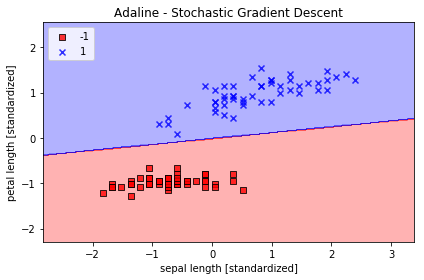

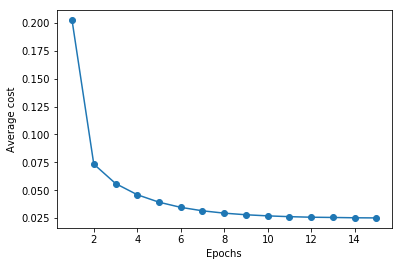

In [39]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title("Adaline - Stochastic Gradient Descent")
plt.xlabel("sepal length [standardized]")
plt.ylabel("petal length [standardized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Average cost")
plt.show()